# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [6]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

Text(0, 0.5, 'Winning times')

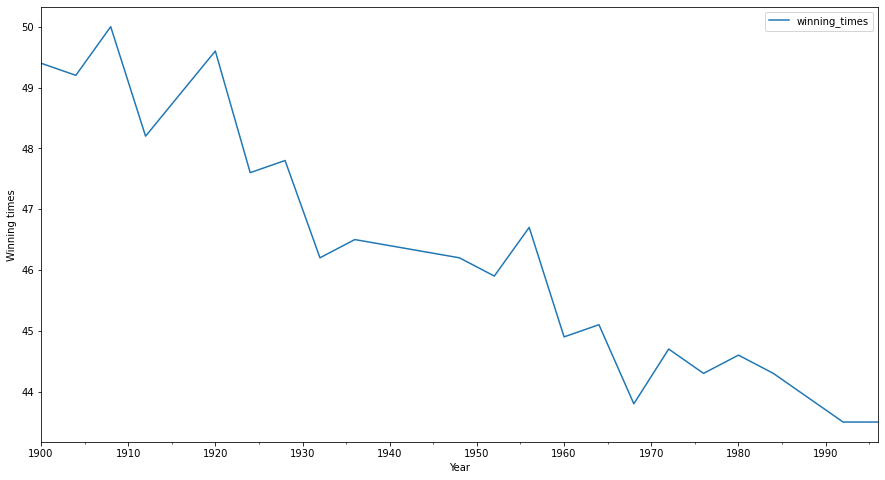

In [30]:
# Plot the time series
data.plot(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Winning times')

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [13]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

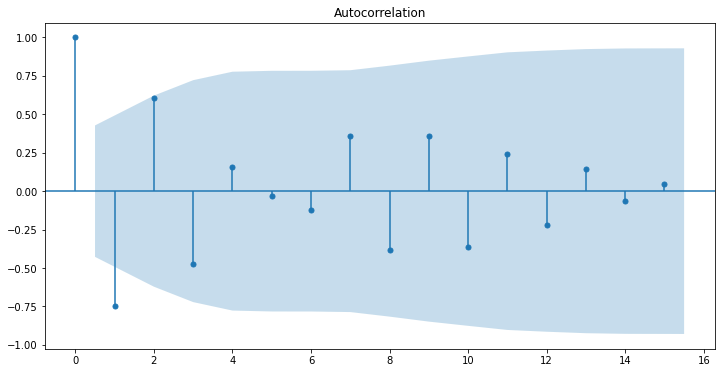

In [18]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(data_diff,ax=ax, lags=15);

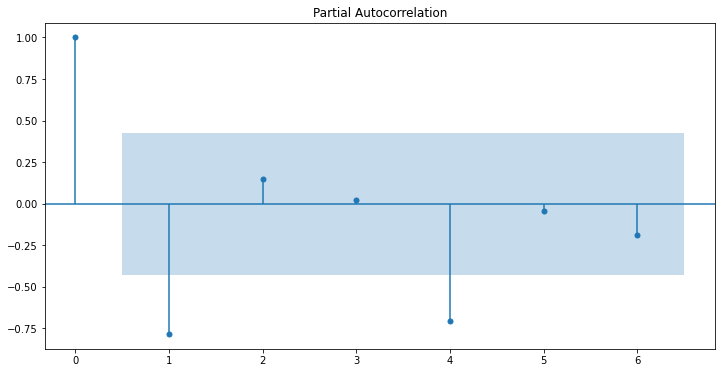

In [28]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(data_diff,ax=ax, lags=6);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# an ARMAmodel
model_arma = ARIMA(data_diff, order=(1,1,1))
result_arma = model_arma.fit()
result_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.643
Date:                Wed, 24 Aug 2022   AIC                             49.287
Time:                        17:43:47   BIC                             52.274
Sample:                    12-31-1904   HQIC                            49.870
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7061      0.154     -4.587      0.000      -1.008      -0.404
ma.L1         -0.9991     46.200     -0.022      0.983     -91.550      89.552
sigma2         0.4022     18.534      0.022      0.983     -35.924      36.729
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.65   Prob(JB):                         0.68
Heteroskedasticity (H):               0.42   Skew:                            -0.13
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model_arma = ARIMA(data_diff, order=(1,2,1))
result_arma = model_arma.fit()
result_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -25.781
Date:                Wed, 24 Aug 2022   AIC                             57.562
Time:                        17:50:03   BIC                             60.396
Sample:                    12-31-1904   HQIC                            58.042
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8640      0.155     -5.556      0.000      -1.169      -0.559
ma.L1         -0.9989     31.760     -0.031      0.975     -63.247      61.250
sigma2         0.6597     20.890      0.032      0.975     -40.285      41.604
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.14   Prob(JB):                         0.96
Heteroskedasticity (H):               0.23   Skew:                            -0.08
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_arma = ARIMA(data_diff, order=(1,2,2))
result_arma = model_arma.fit()
result_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -24.829
Date:                Wed, 24 Aug 2022   AIC                             57.657
Time:                        17:51:01   BIC                             61.435
Sample:                    12-31-1904   HQIC                            58.297
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6960      0.209     -3.336      0.001      -1.105      -0.287
ma.L1         -1.9624    154.849     -0.013      0.990    -305.461     301.536
ma.L2          0.9634    149.132      0.006      0.995    -291.330     293.257
sigma2         0.4344     67.311      0.006      0.995    -131.493     132.361
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.98   Prob(JB):                         0.55
Heteroskedasticity (H):               0.47   Skew:                             0.17
Prob(H) (two-sided):                  0.38   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
"""
The first ARIMA model(1,1) is the best because it has the lowest AIC value.
The model with the lower AIC score is expected to strike a superior balance between its ability 
to fit the data set and its ability to avoid over-fitting the data set.
It also has the shortest time compared to the other two"""

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 